# Declarando las fechas

In [385]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="openpyxl")

In [386]:
Fecha_Inicio = pd.to_datetime('2024-06-01')
Fecha_Fin = pd.to_datetime('2024-06-30')

# Extrayendo información del Excel

In [387]:
hojas = pd.read_excel('/root/Proyectos/Figuresina/data/Figuresina.xlsx', sheet_name=None)

In [388]:
Referencias = hojas['Referencias']
Clientes = hojas['Clientes']
Proveedores = hojas['Proveedores']
Empleados = hojas['Empleados']
Ventas = hojas['Ventas']
Gastos = hojas['Gastos']
Fundida = hojas['Fundida']
Pulida = hojas['Pulida']
Pintura = hojas['Pintura']
Empaque = hojas['Empaque']

In [389]:
df_Referencias = Referencias.copy()
df_Clientes = Clientes.copy()
df_Proveedores = Proveedores.copy()
df_Empleados = Empleados[Empleados['Estado']=='Activo'].copy()
df_Ventas = Ventas.drop(columns=['Valor total']).copy()[(Ventas['Fecha']>=Fecha_Inicio) & (Ventas['Fecha']<=Fecha_Fin)].drop(columns=['Fecha'])
df_Gastos = Gastos.drop(columns=['Valor Total']).copy()[(Gastos['Fecha']>=Fecha_Inicio) & (Gastos['Fecha']<=Fecha_Fin)].drop(columns=['Fecha'])
df_Fundida = Fundida.copy()[(Fundida['Fecha']>=Fecha_Inicio) & (Fundida['Fecha']<=Fecha_Fin)].drop(columns=['Fecha'])
df_Pulida = Pulida.copy()[(Pulida['Fecha']>=Fecha_Inicio) & (Pulida['Fecha']<=Fecha_Fin)].drop(columns=['Fecha'])
df_Pintura = Pintura.copy()[(Pintura['Fecha']>=Fecha_Inicio) & (Pintura['Fecha']<=Fecha_Fin)].drop(columns=['Fecha'])
df_Empaque = Empaque.copy()[(Empaque['Fecha']>=Fecha_Inicio) & (Empaque['Fecha']<=Fecha_Fin)].drop(columns=['Fecha'])

# Valores nulos

In [390]:
if df_Ventas.isnull().astype(int).sum().sum() != 0:
    print('Hay valores nulos en la hoja de Ventas. Llene correctamente la hoja antes de mirar los resultados porque no seran validos')

df_Ventas.dropna(inplace=True)

In [391]:
if df_Gastos.isnull().astype(int).sum().sum() != 0:
    print('Hay valores nulos en la hoja de Gastos. Llene correctamente la hoja antes de mirar los resultados porque no seran validos')

df_Gastos.dropna(inplace=True)

In [392]:
if df_Fundida.isnull().astype(int).sum().sum() != 0:
    print('Hay valores nulos en la hoja de Fundida. Llene correctamente la hoja antes de mirar los resultados porque no seran validos')

df_Fundida.dropna(inplace=True)

In [393]:
if df_Pulida.isnull().astype(int).sum().sum() != 0:
    print('Hay valores nulos en la hoja de Pulida. Llene correctamente la hoja antes de mirar los resultados porque no seran validos')

df_Pulida.dropna(inplace=True)

In [394]:
if df_Pintura.isnull().astype(int).sum().sum() != 0:
    print('Hay valores nulos en la hoja de Pintura. Llene correctamente la hoja antes de mirar los resultados porque no seran validos')

df_Pintura.dropna(inplace=True)

In [395]:
if df_Empaque.isnull().astype(int).sum().sum() != 0:
    print('Hay valores nulos en la hoja de Empaque. Llene correctamente la hoja antes de mirar los resultados porque no seran validos')

df_Empaque.dropna(inplace=True)

# Fundida

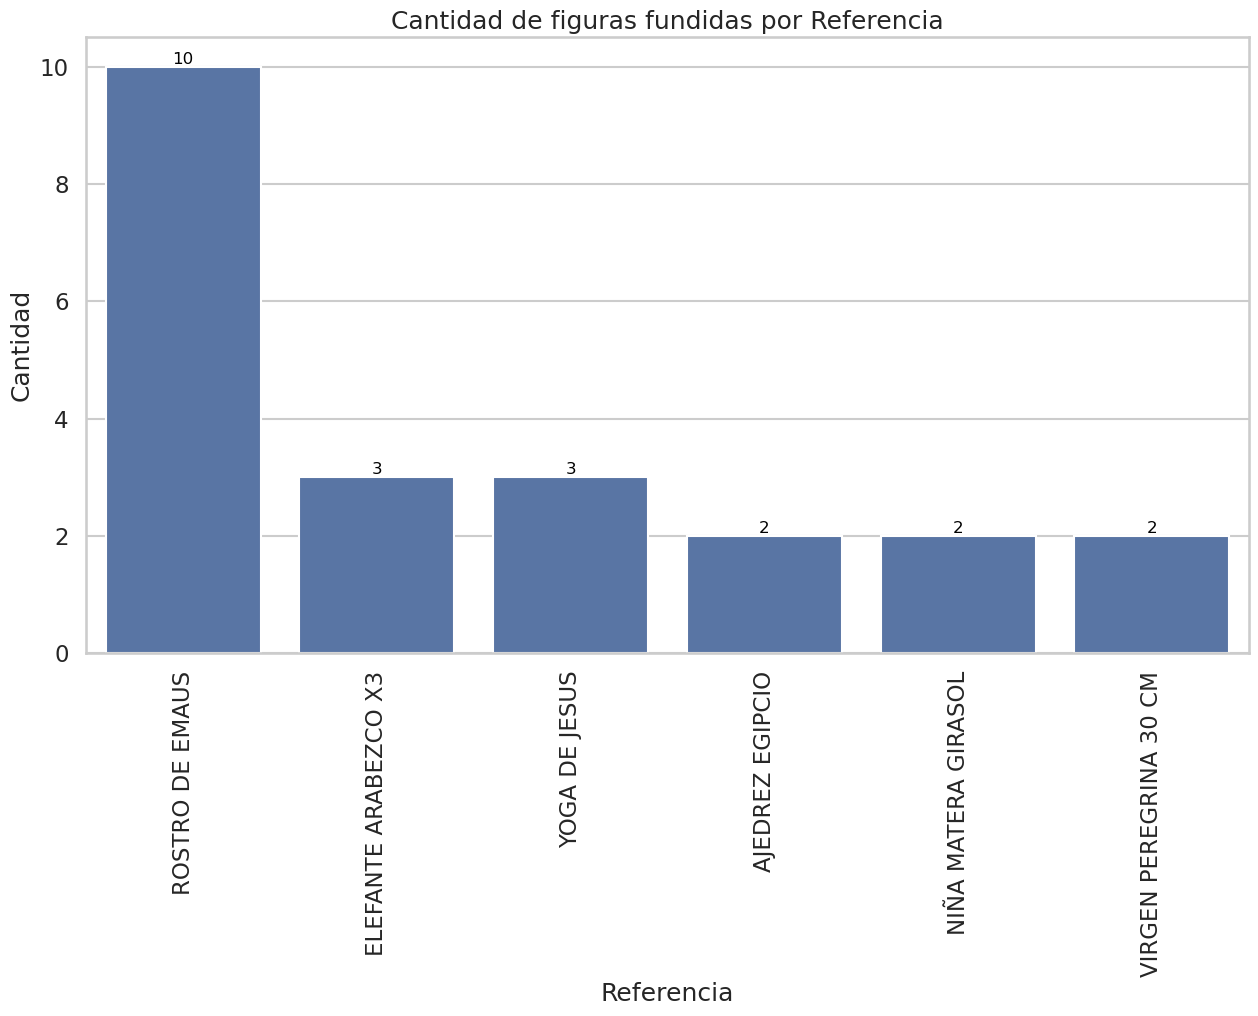

In [396]:
df_Fundida_Referencias = df_Fundida.groupby('Referencia')['Cantidad'].sum().sort_values(ascending=False).reset_index()

fig = plt.figure(figsize=(15, 8))
ax = sns.barplot(data=df_Fundida_Referencias, x='Referencia', y='Cantidad')
ax.set_title('Cantidad de figuras fundidas por Referencia')
ax.set_xlabel('Referencia')
ax.set_ylabel('Cantidad')

# Ajustar la rotación de las etiquetas del eje X sin establecer las etiquetas directamente
ax.tick_params(axis='x', rotation=90)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

plt.show()

In [397]:
df_Producción_Fundida = df_Fundida.groupby('Fundidor')[['Cantidad', 'Peso total (gr)']].sum().reset_index()
Promedio_Cantidad_Fundida = df_Producción_Fundida['Cantidad'].mean()
Promedio_Peso_Fundida = df_Producción_Fundida['Peso total (gr)'].mean()

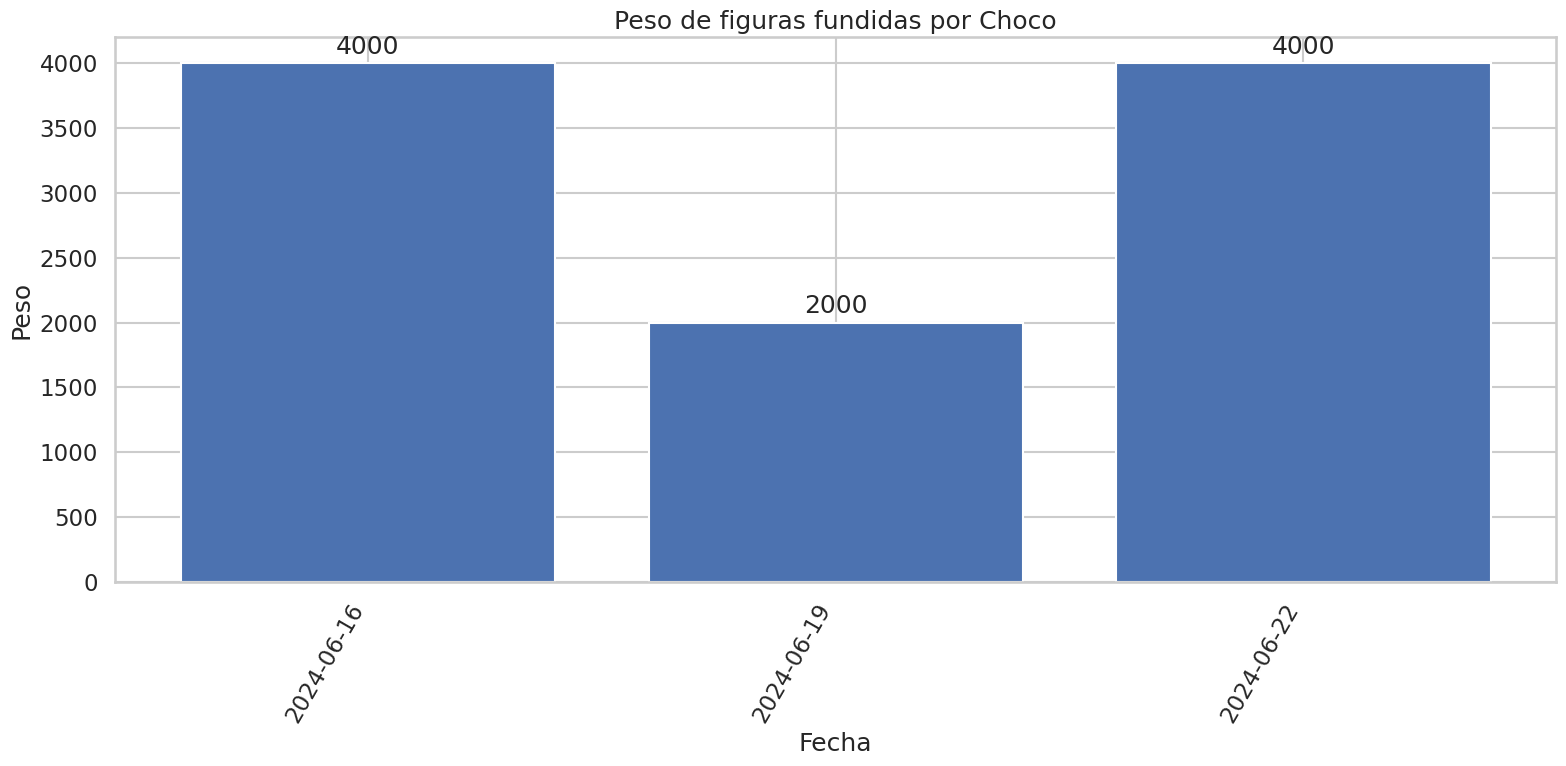

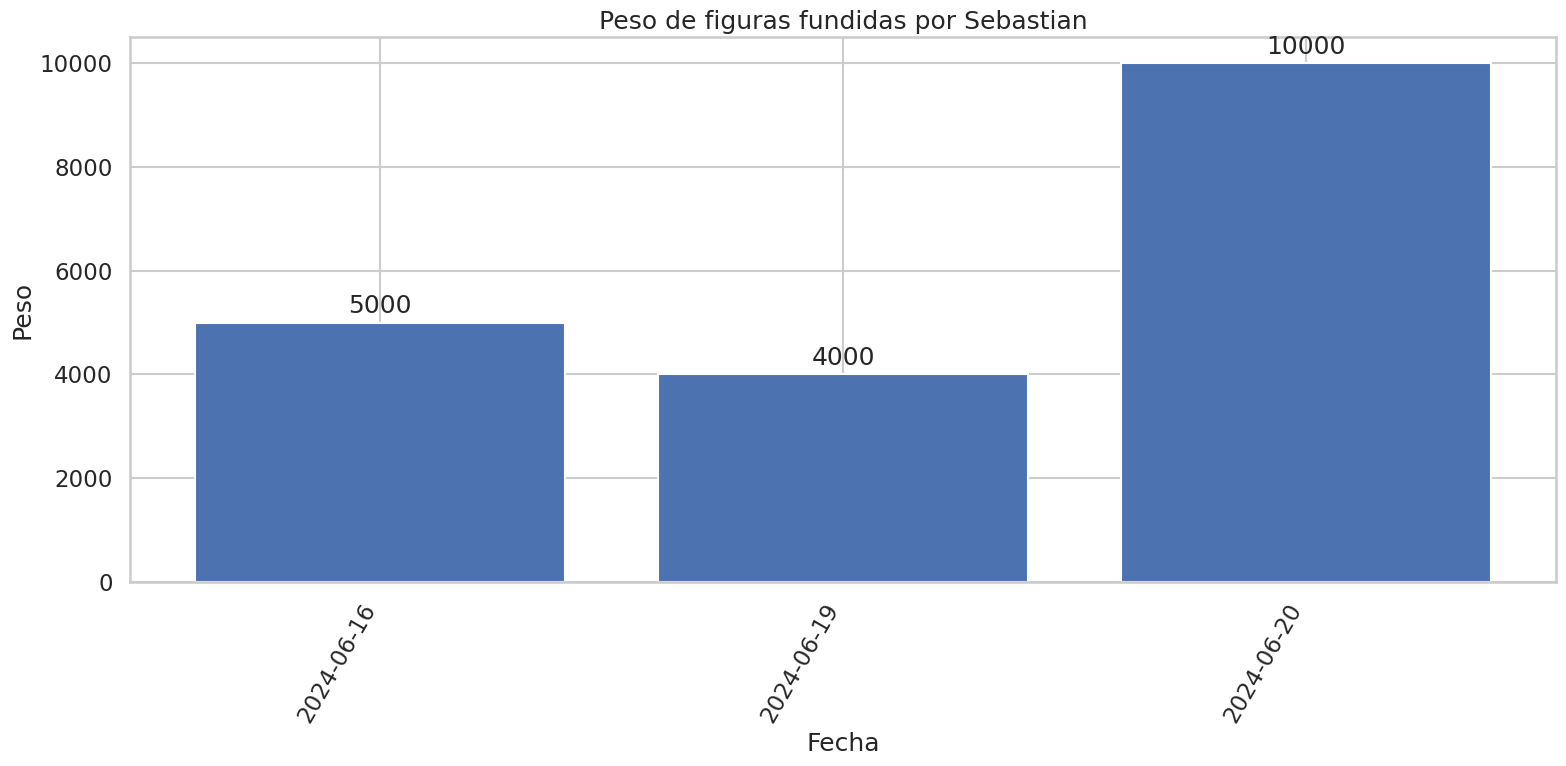

In [423]:
df_Produción_Fundida_Peso_Dias = Fundida.copy().groupby(['Fecha', 'Fundidor'])['Peso total (gr)'].sum().reset_index()

# Obtener los valores únicos de 'Fundidor'
fundidores_unicos = df_Produción_Fundida_Peso_Dias['Fundidor'].unique()

# Iterar sobre cada 'Fundidor' y crear un barplot
for fundidor in fundidores_unicos:
    # Filtrar el DataFrame para el 'Fundidor' actual
    df_temp = df_Produción_Fundida_Peso_Dias[df_Produción_Fundida_Peso_Dias['Fundidor'] == fundidor]
    
    # Crear una figura y un eje
    fig, ax = plt.subplots(figsize=(16, 8))
    
    # Barplot para el 'Fundidor' actual
    bars = ax.bar(df_temp['Fecha'].astype(str), df_temp['Peso total (gr)'])
    
    # Agregar la altura de cada barra en la parte superior
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 puntos de desplazamiento vertical
                    textcoords="offset points",
                    ha='center', va='bottom')
    
    # Mejorar la presentación
    ax.set_xlabel('Fecha')
    ax.set_ylabel('Peso')
    ax.set_title(f'Peso de figuras fundidas por {fundidor}')
    plt.xticks(rotation=60, ha='right')  # Rotar las etiquetas del eje x para mejor lectura
    plt.tight_layout()  # Ajustar automáticamente los parámetros de la subtrama
    
    plt.show()

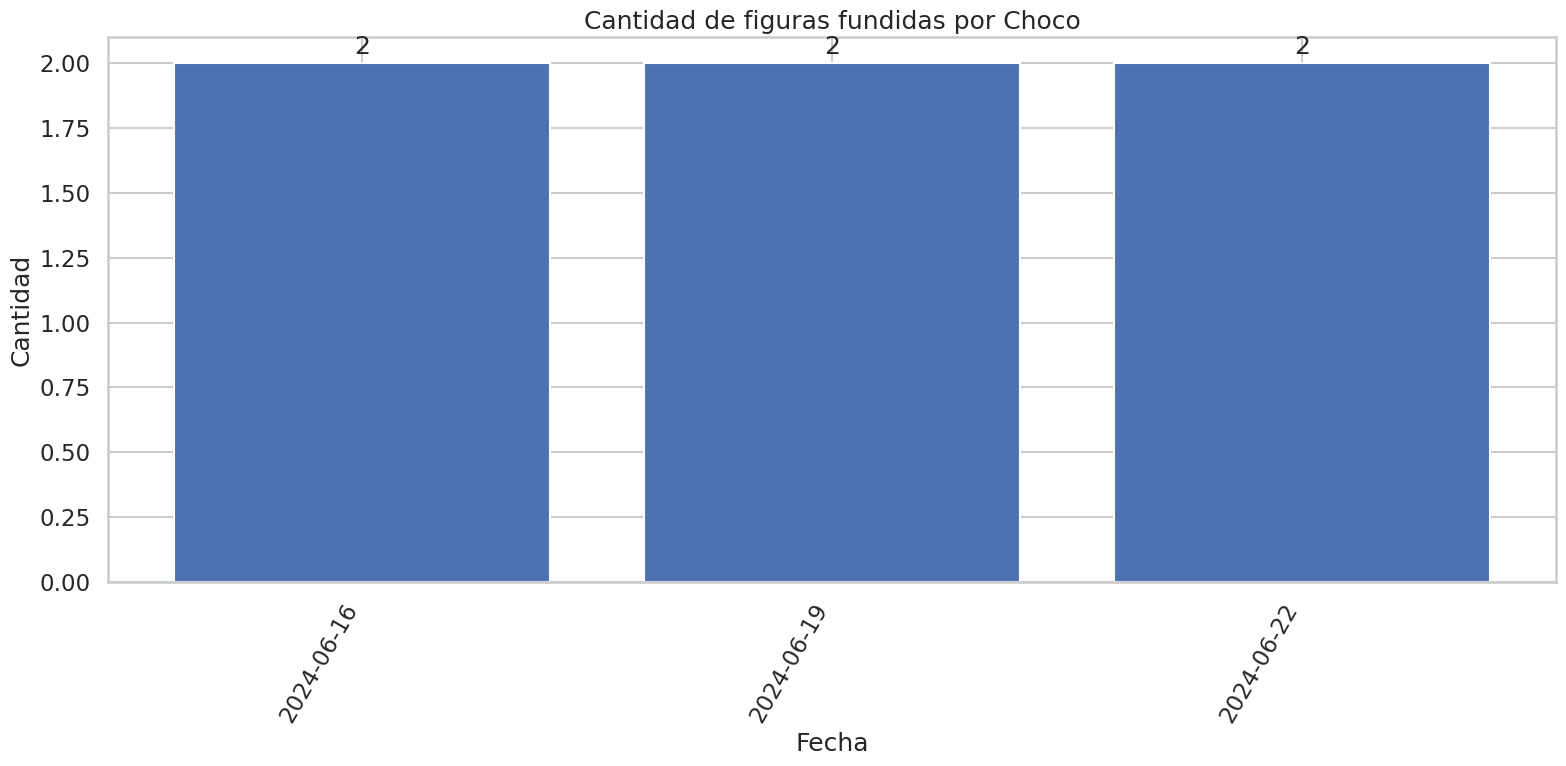

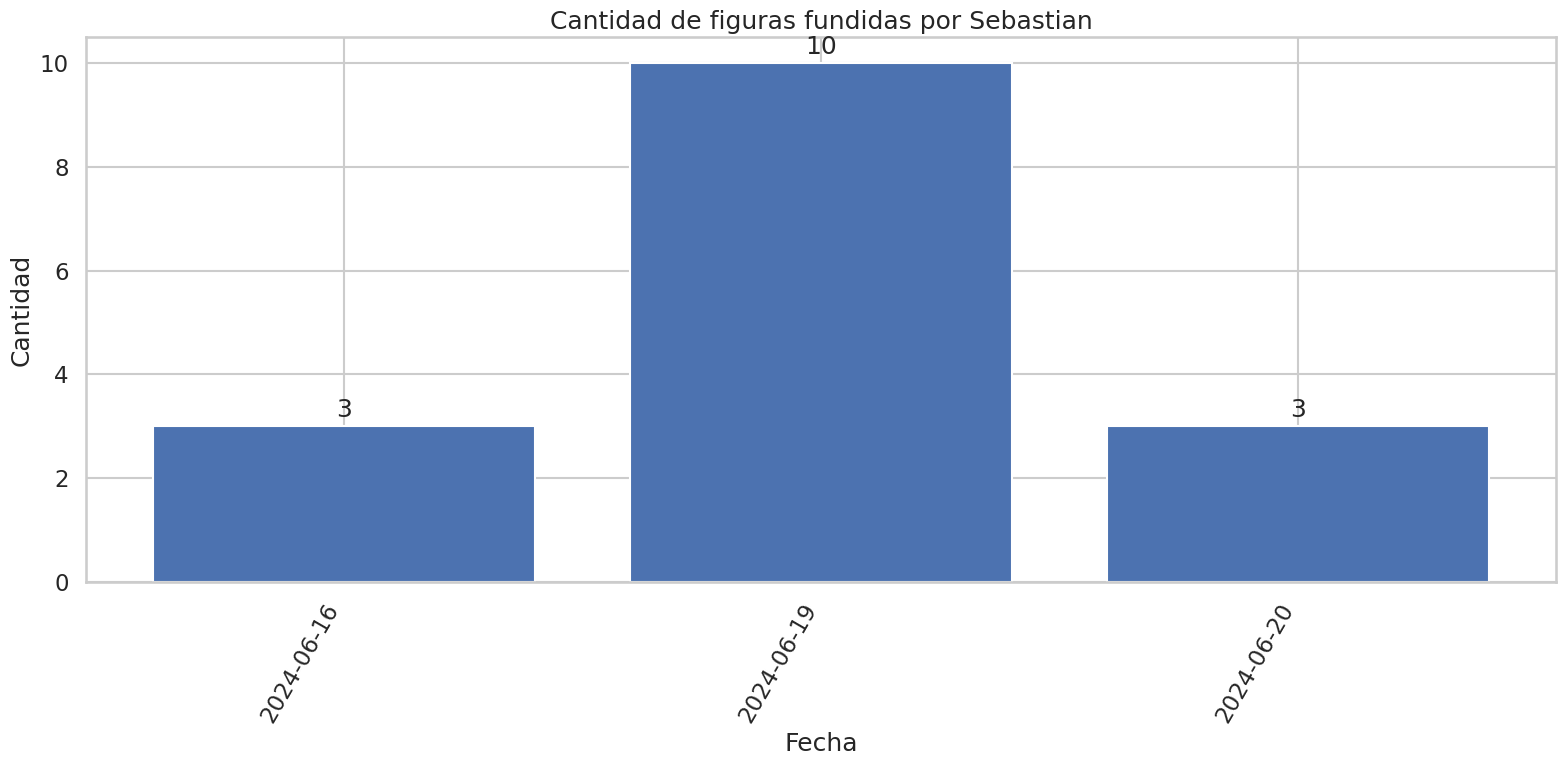

In [422]:
df_Produción_Fundida_Cantidad_Dias = Fundida.copy().groupby(['Fecha', 'Fundidor'])['Cantidad'].sum().reset_index()

# Obtener los valores únicos de 'Fundidor'
fundidores_unicos = df_Produción_Fundida_Cantidad_Dias['Fundidor'].unique()

# Iterar sobre cada 'Fundidor' y crear un barplot
for fundidor in fundidores_unicos:
    # Filtrar el DataFrame para el 'Fundidor' actual
    df_temp = df_Produción_Fundida_Cantidad_Dias[df_Produción_Fundida_Cantidad_Dias['Fundidor'] == fundidor]
    
    # Crear una figura y un eje
    fig, ax = plt.subplots(figsize=(16, 8))
    
    # Barplot para el 'Fundidor' actual
    bars = ax.bar(df_temp['Fecha'].astype(str), df_temp['Cantidad'])
    
    # Agregar la altura de cada barra en la parte superior
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 puntos de desplazamiento vertical
                    textcoords="offset points",
                    ha='center', va='bottom')
    
    # Mejorar la presentación
    ax.set_xlabel('Fecha')
    ax.set_ylabel('Cantidad')
    ax.set_title(f'Cantidad de figuras fundidas por {fundidor}')
    plt.xticks(rotation=60, ha='right')  # Rotar las etiquetas del eje x para mejor lectura
    plt.tight_layout()  # Ajustar automáticamente los parámetros de la subtrama
    
    plt.show()

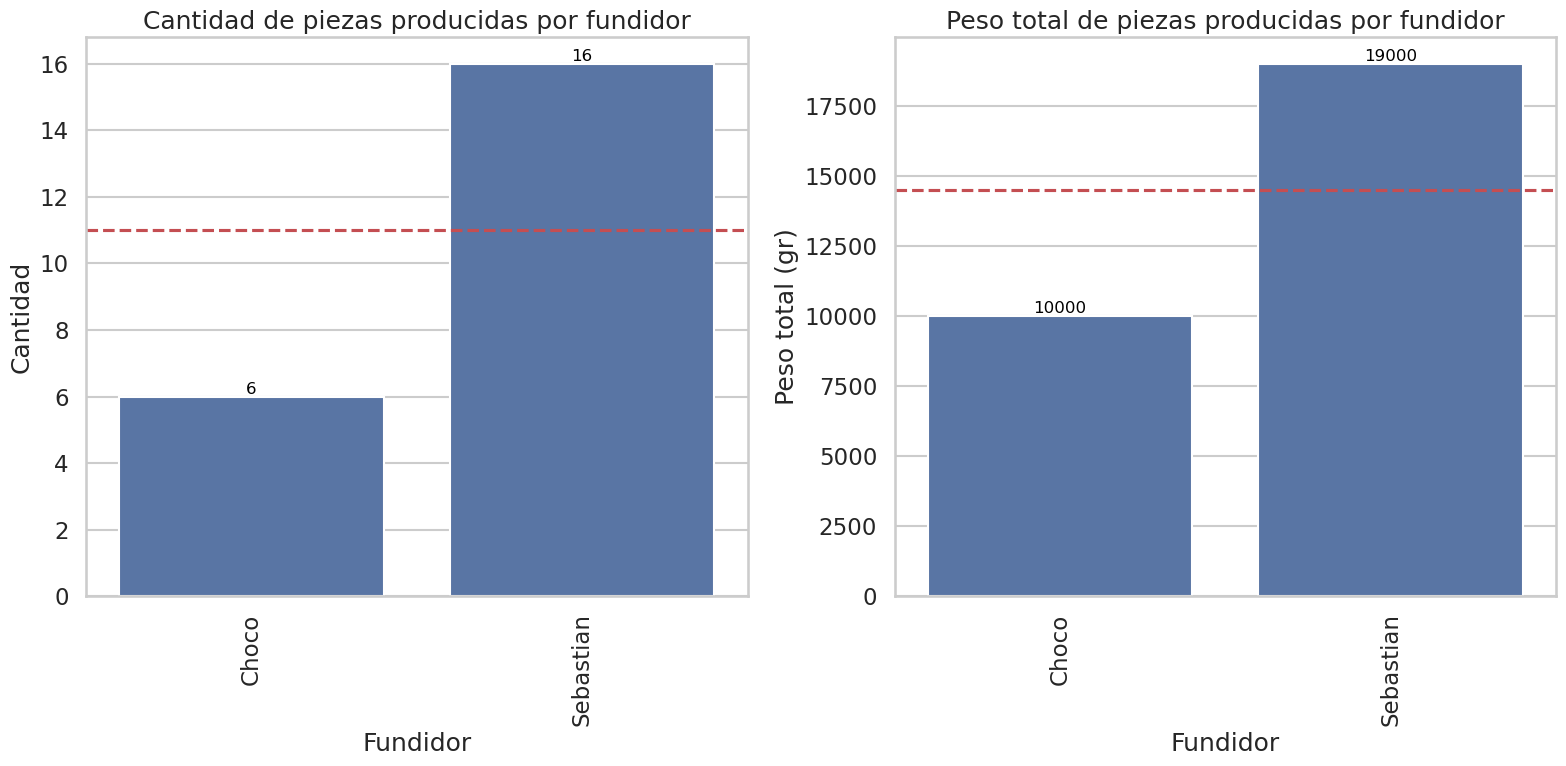

In [399]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# Primer gráfico
sns.barplot(data=df_Producción_Fundida, x='Fundidor', y='Cantidad', ax=ax[0])
ax[0].axhline(Promedio_Cantidad_Fundida, color='r', linestyle='--')
ax[0].set_title('Cantidad de piezas producidas por fundidor')
ax[0].set_ylabel('Cantidad')
ax[0].set_xlabel('Fundidor')
ax[0].tick_params(axis='x', rotation=90)

# Agregar texto en la parte superior de cada barra para el primer gráfico
for p in ax[0].patches:
    ax[0].text(p.get_x() + p.get_width() / 2., p.get_height(), '%d' % int(p.get_height()), 
               fontsize=12, color='black', ha='center', va='bottom')

# Segundo gráfico
sns.barplot(data=df_Producción_Fundida, x='Fundidor', y='Peso total (gr)', ax=ax[1])
ax[1].axhline(Promedio_Peso_Fundida, color='r', linestyle='--')
ax[1].set_title('Peso total de piezas producidas por fundidor')
ax[1].set_ylabel('Peso total (gr)')
ax[1].set_xlabel('Fundidor')
ax[1].tick_params(axis='x', rotation=90)

# Agregar texto en la parte superior de cada barra para el segundo gráfico
for p in ax[1].patches:
    ax[1].text(p.get_x() + p.get_width() / 2., p.get_height(), '%d' % int(p.get_height()), 
               fontsize=12, color='black', ha='center', va='bottom')
    
#Tercer gráfico
sns.barplot()

plt.tight_layout()
plt.show()

In [400]:
total_figuras_fundida = Fundida['Cantidad'].sum()
total_peso_fundida = Fundida['Peso total (gr)'].sum()

print('Se fundieron un total de {} figuras con un peso total de {} kilos'.format(total_figuras_fundida, total_peso_fundida/1000))

Se fundieron un total de 22 figuras con un peso total de 29.0 kilos


# Pulida

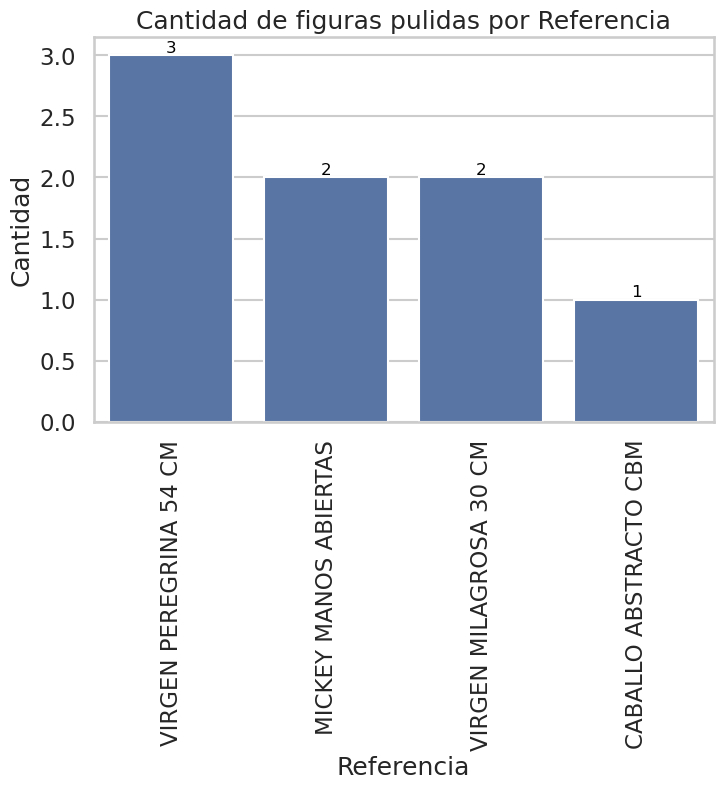

In [401]:
df_Pulida_Referencias = df_Pulida.groupby('Referencia')['Cantidad'].sum().sort_values(ascending=False).reset_index()

fig = plt.figure(figsize=(8, 5))
ax = sns.barplot(data=df_Pulida_Referencias, x='Referencia', y='Cantidad')
ax.set_title('Cantidad de figuras pulidas por Referencia')
ax.set_xlabel('Referencia')
ax.set_ylabel('Cantidad')

# Ajustar la rotación de las etiquetas del eje X sin establecer las etiquetas directamente
ax.tick_params(axis='x', rotation=90)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

plt.show()

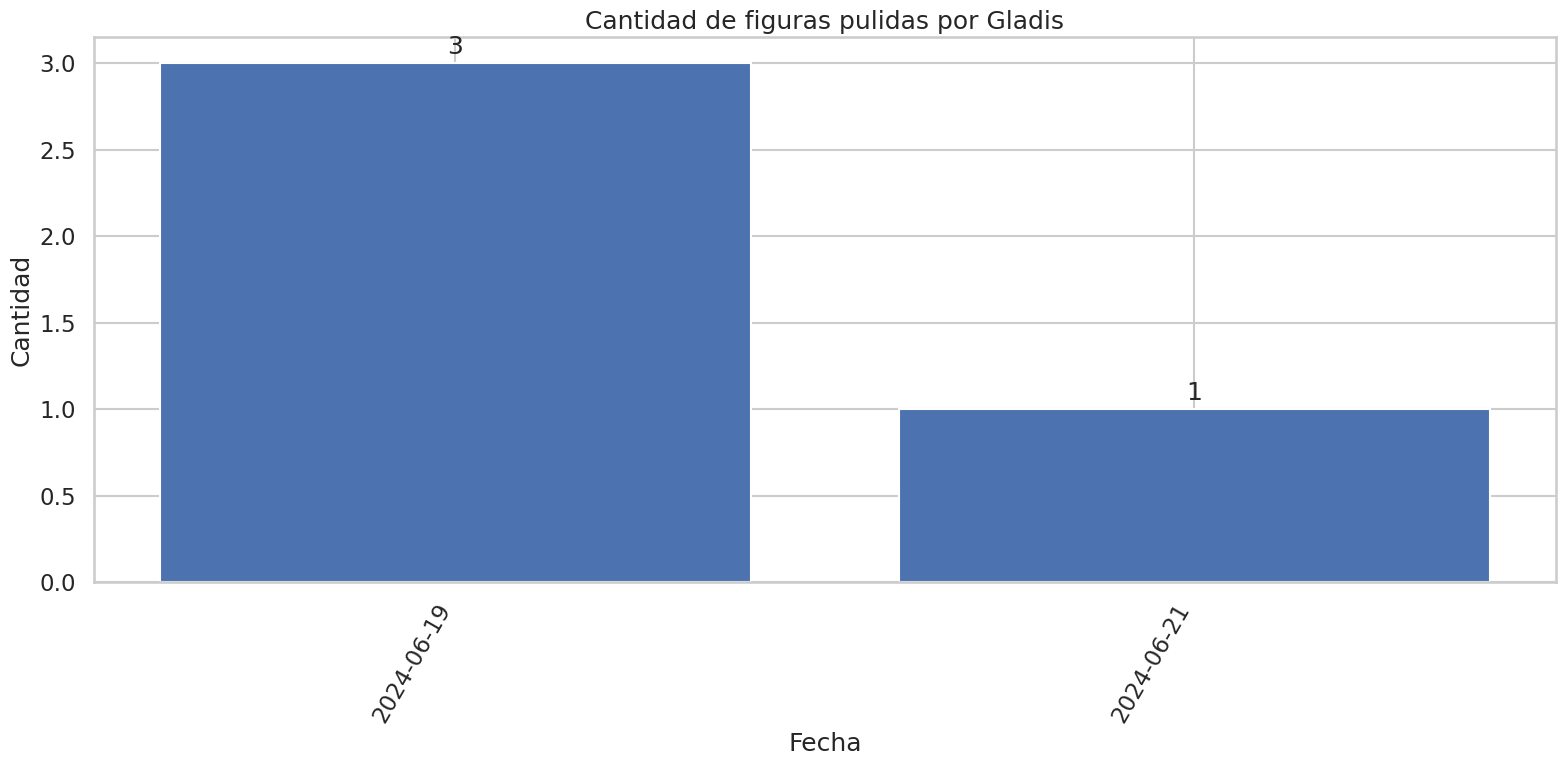

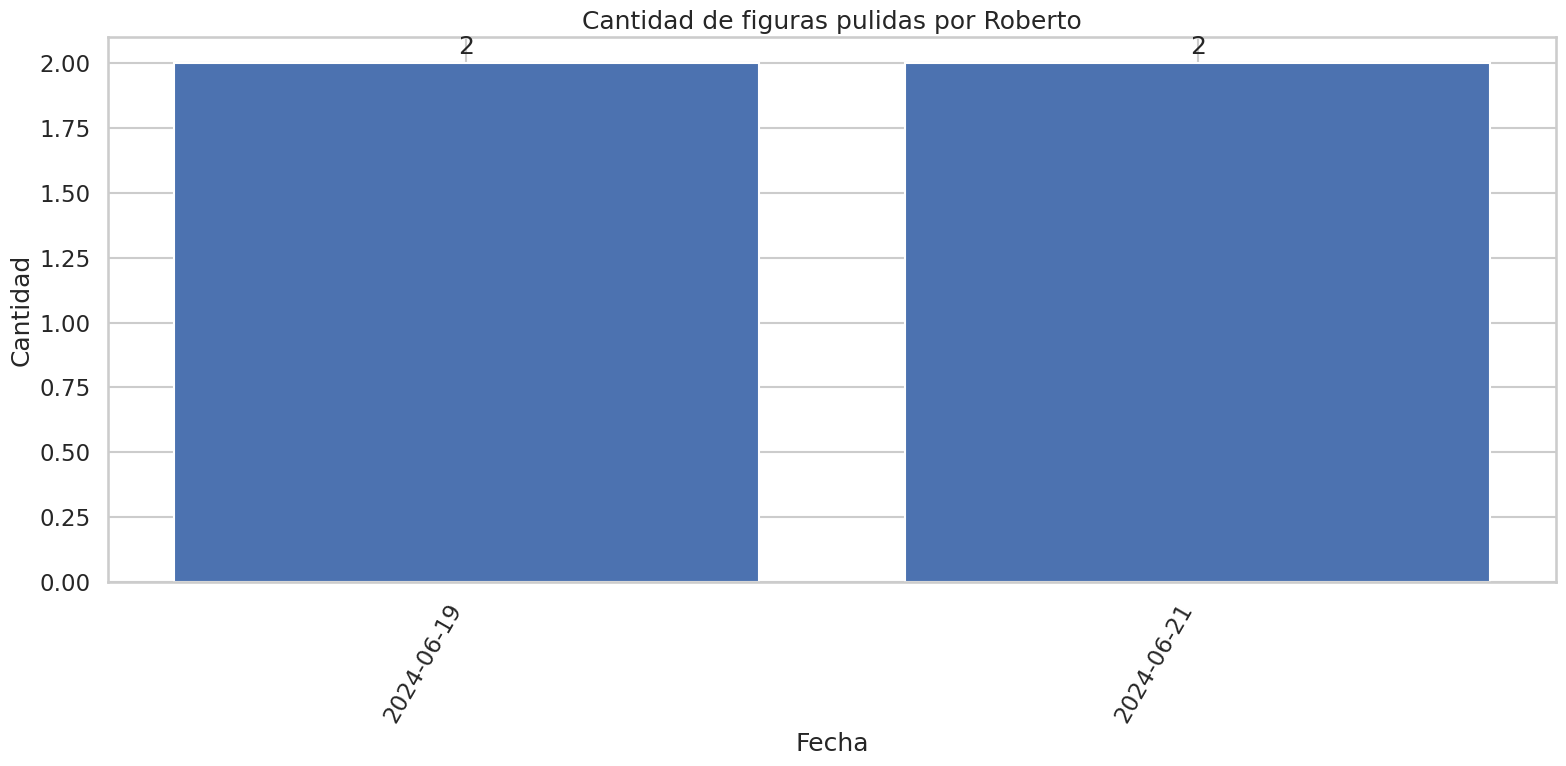

In [402]:
df_Produción_Pulida_Peso_Dias = Pulida.copy().groupby(['Fecha', 'Pulidor'])['Cantidad'].sum().reset_index()

# Obtener los valores únicos de 'Pulidor'
Pulidores_unicos = df_Produción_Pulida_Peso_Dias['Pulidor'].unique()

# Iterar sobre cada 'Pulidor' y crear un barplot
for Pulidor in Pulidores_unicos:
    # Filtrar el DataFrame para el 'Pulidor' actual
    df_temp = df_Produción_Pulida_Peso_Dias[df_Produción_Pulida_Peso_Dias['Pulidor'] == Pulidor]
    
    # Crear una figura y un eje
    fig, ax = plt.subplots(figsize=(16, 8))
    
    # Barplot para el 'Pulidor' actual
    bars = ax.bar(df_temp['Fecha'].astype(str), df_temp['Cantidad'])
    
    # Agregar la altura de cada barra en la parte superior
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 puntos de desplazamiento vertical
                    textcoords="offset points",
                    ha='center', va='bottom')
    
    # Mejorar la presentación
    ax.set_xlabel('Fecha')
    ax.set_ylabel('Cantidad')
    ax.set_title(f'Cantidad de figuras pulidas por {Pulidor}')
    plt.xticks(rotation=60, ha='right')  # Rotar las etiquetas del eje x para mejor lectura
    plt.tight_layout()  # Ajustar automáticamente los parámetros de la subtrama
    
    plt.show()

In [403]:
df_Producción_Pulida = df_Pulida.groupby('Pulidor')['Cantidad'].sum().reset_index()
Promedio_Cantidad_Pulida = df_Producción_Pulida['Cantidad'].mean()

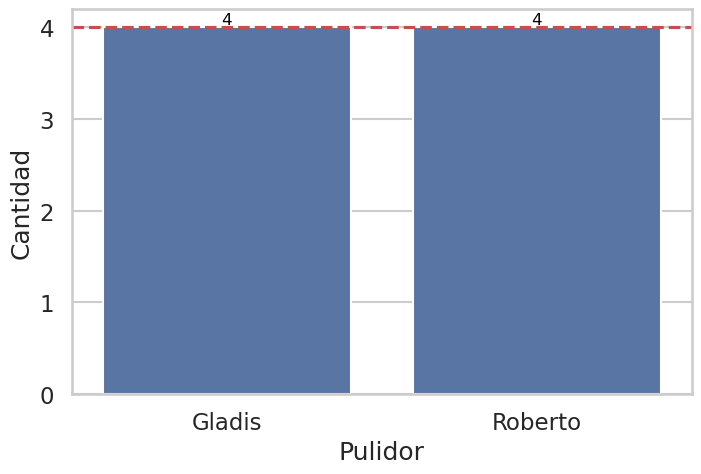

In [404]:
fig = plt.figure(figsize=(8, 5))
ax = sns.barplot(data=df_Producción_Pulida, x='Pulidor', y='Cantidad')
plt.axhline(Promedio_Cantidad_Pulida, color='r', linestyle='--')

# Iterar sobre las barras del gráfico
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

plt.show()

In [405]:
total_figuras_pulidas = df_Pulida['Cantidad'].sum()
print('Se pulieron un total de {} figuras'.format(total_figuras_pulidas))

Se pulieron un total de 8 figuras


# Pintura

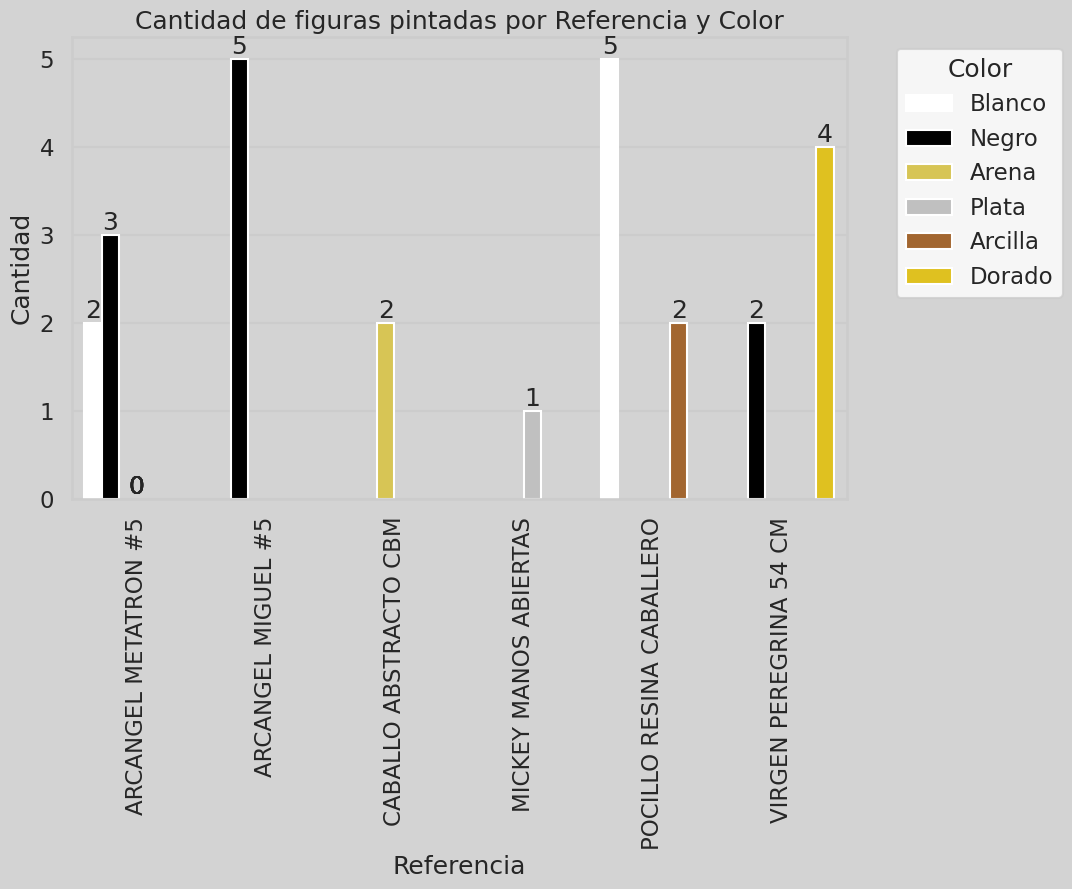

In [406]:
# Agrupar por 'Referencia' y 'Color', y sumar las cantidades
df_agrupado = df_Pintura.groupby(['Referencia', 'Color']).agg("sum").reset_index()

# Definir una paleta de colores personalizada
colores = {
    'Blanco': '#FFFFFF',
    'Negro': '#000000',
    'Dorado': '#FFD700',
    'Plata': '#C0C0C0',
    'Arcilla': '#B5651D',
    'Arena': '#ECD540'
}

# Ajustar el estilo y el contexto de Seaborn para mejorar la visibilidad
sns.set(style="whitegrid", context="talk")

# Crear el barplot con la paleta de colores definida
plt.figure(figsize=(10, 6), facecolor='lightgrey')
barplot = sns.barplot(data=df_agrupado, x='Referencia', y='Cantidad', hue='Color', palette=colores)

# Mejorar la presentación
plt.title('Cantidad de figuras pintadas por Referencia y Color')
plt.xlabel('Referencia')
plt.ylabel('Cantidad')
plt.xticks(rotation=90)
plt.legend(title='Color', bbox_to_anchor=(1.05, 1), loc='upper left')

# Cambiar el color de fondo del área del gráfico (no el de la figura completa)
plt.gca().set_facecolor('lightgrey')

# Agregar la altura de cada barra en la parte superior de la misma
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

plt.show()

In [407]:
df_Producción_Pintura = df_Pintura.groupby('Pintor')['Cantidad'].sum().reset_index()
Promedio_Cantidad_Pintura = df_Producción_Pintura['Cantidad'].mean()

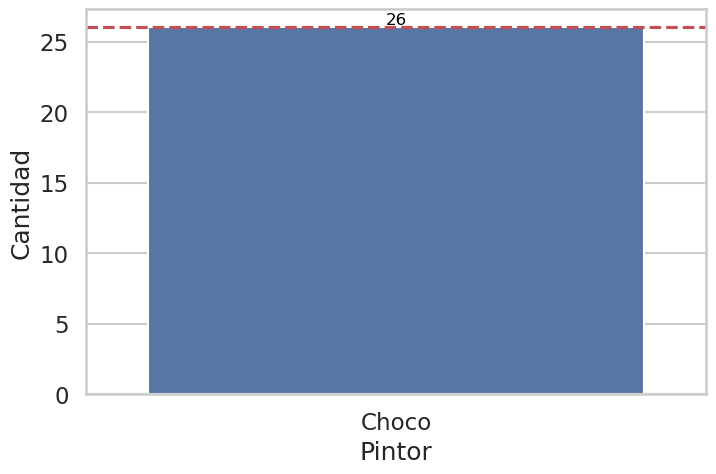

In [408]:
fig = plt.figure(figsize=(8, 5))
ax = sns.barplot(data=df_Producción_Pintura, x='Pintor', y='Cantidad')
plt.axhline(Promedio_Cantidad_Pintura, color='r', linestyle='--')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

plt.show()

In [409]:
total_figuras_pintadas = df_Pintura['Cantidad'].sum()
print('Se pintaron un total de {} figuras'.format(total_figuras_pintadas))

Se pintaron un total de 26 figuras


# Empaque

## Local

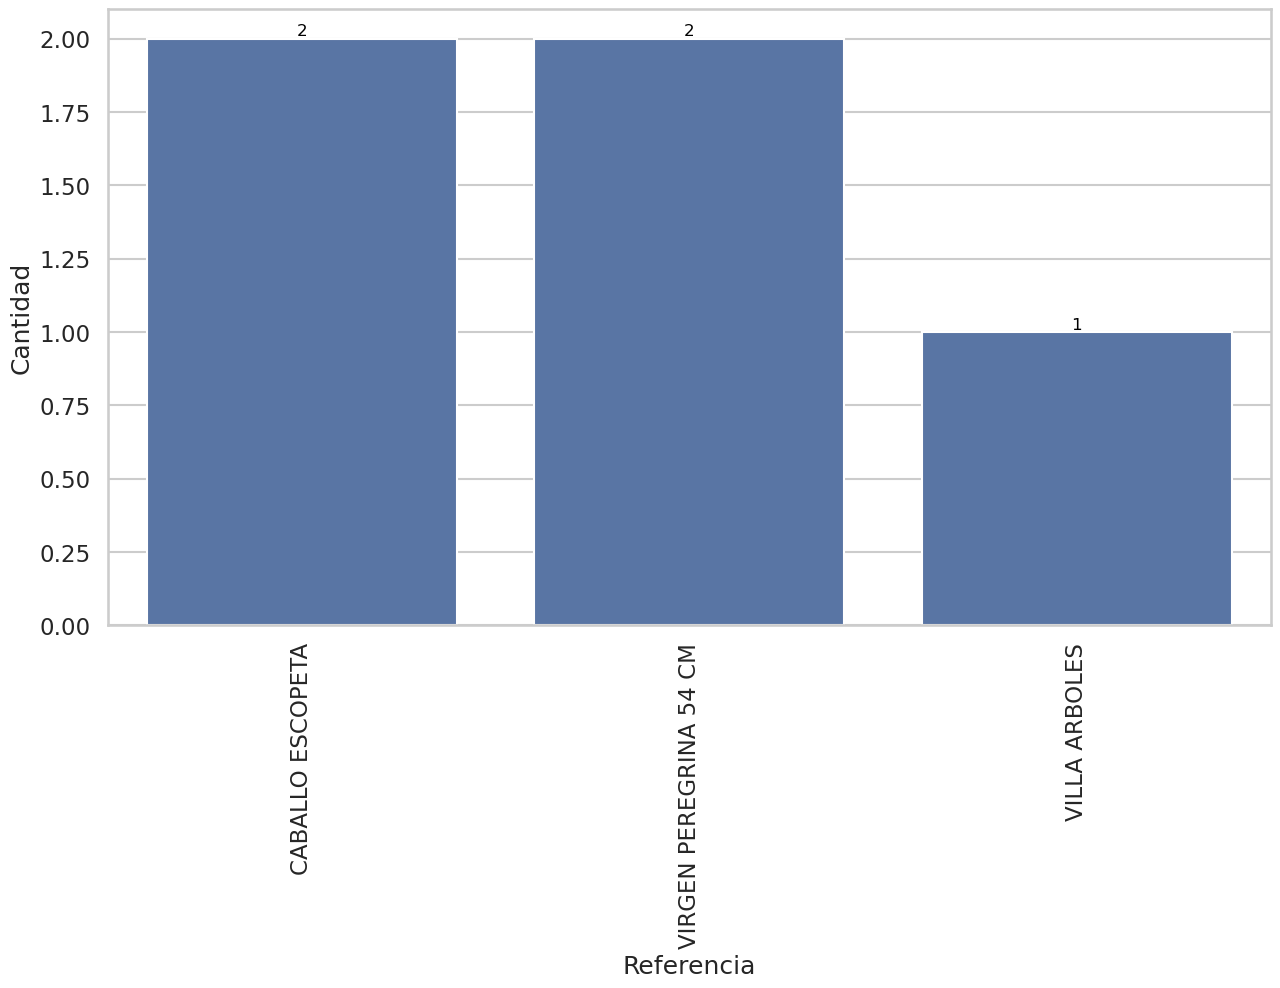

In [410]:
df_Empaque_Local = df_Empaque[df_Empaque['Destino'] == 'Local'].drop(columns=['Empacador', 'Empaque', 'Transporte', 'Numero de guia', 'Destino']).groupby('Referencia').sum().reset_index().sort_values(by='Cantidad', ascending=False)

fig = plt.figure(figsize=(15, 8))
ax = sns.barplot(data=df_Empaque_Local, x='Referencia', y='Cantidad')
ax.tick_params(axis='x', rotation=90)

# Iterar sobre las barras del gráfico
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

plt.show()

In [411]:
total_local = df_Empaque_Local['Cantidad'].sum()
print('Se empacaron un total de {} figuras para el destino local'.format(total_local))

Se empacaron un total de 5 figuras para el destino local


## Envios

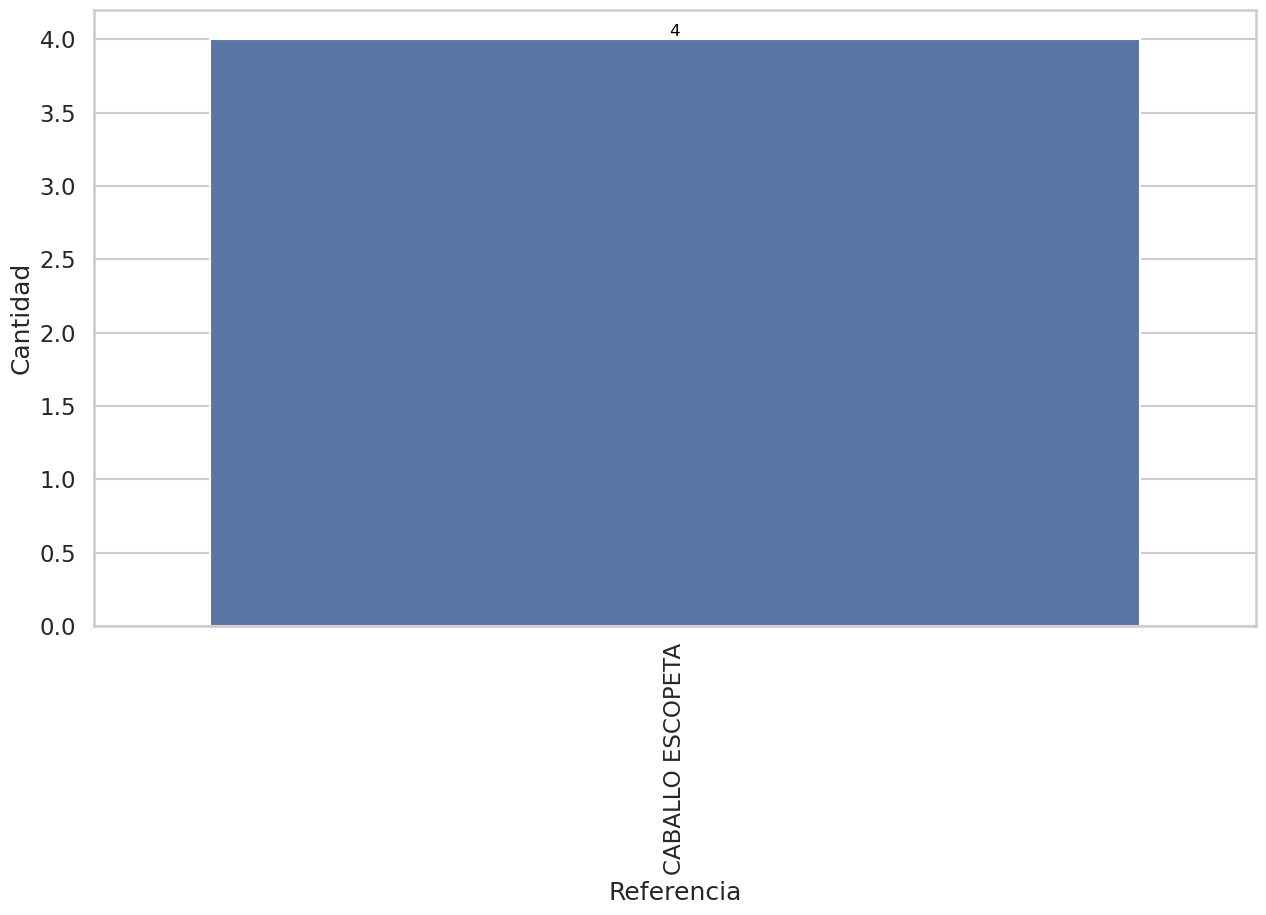

In [412]:
df_Empaque_Envios = df_Empaque[df_Empaque['Destino'] != 'Local'].drop(columns=['Empacador', 'Empaque', 'Transporte', 'Numero de guia', 'Destino']).groupby('Referencia').sum().reset_index().sort_values(by='Cantidad', ascending=False)

fig = plt.figure(figsize=(15, 8))
ax = sns.barplot(data=df_Empaque_Envios, x='Referencia', y='Cantidad')
ax.tick_params(axis='x', rotation=90)

# Iterar sobre las barras del gráfico
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

plt.show()

In [413]:
total_envios = df_Empaque_Envios['Cantidad'].sum()
print('Se empacaron un total de {} figuras para envios'.format(total_envios))

Se empacaron un total de 4 figuras para envios


# Ventas

In [414]:
df_Ventas['Valor Total'] = df_Ventas['Cantidad'] * df_Ventas['Valor u.']
ventas_totales = df_Ventas['Valor Total'].sum()
print('Se vendio un total de ${} pesos'.format(ventas_totales))

Se vendio un total de $440000 pesos


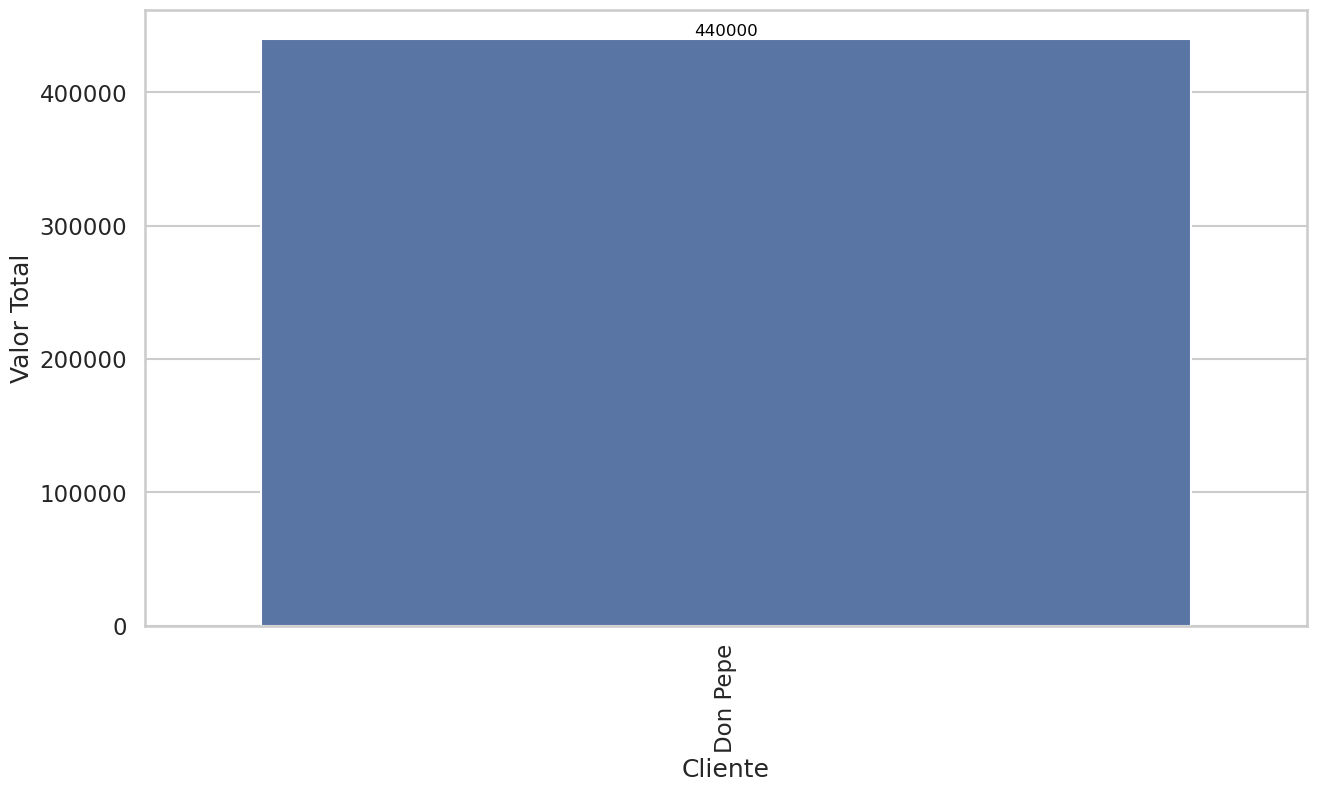

In [415]:
df_Ventas_Clientes = df_Ventas.groupby('Cliente')['Valor Total'].sum().sort_values(ascending=False).reset_index()

fig = plt.figure(figsize=(15, 8))
ax = sns.barplot(data=df_Ventas_Clientes, x='Cliente', y='Valor Total')

ax.tick_params(axis='x', rotation=90)

# Iterar sobre las barras del gráfico
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

plt.show()

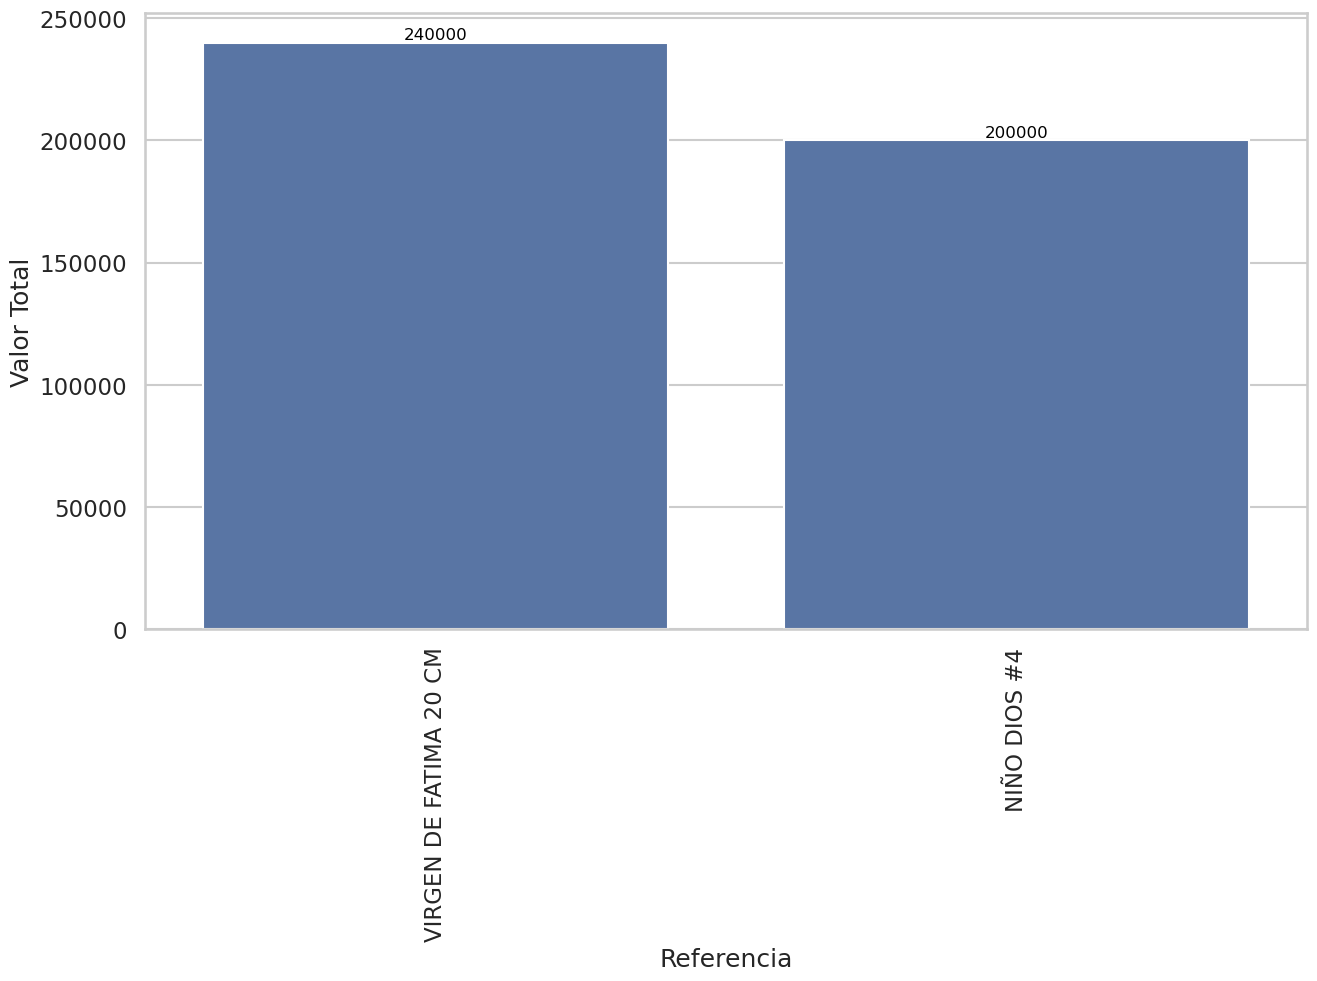

In [416]:
df_Ventas_Referencias = df_Ventas.groupby('Referencia').sum(numeric_only=True).reset_index().sort_values('Valor Total', ascending=False)

fig = plt.figure(figsize=(15,8))
ax = sns.barplot(data=df_Ventas_Referencias, x='Referencia', y='Valor Total')
ax.tick_params(axis='x', rotation=90)

# Iterar sobre las barras del gráfico
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

plt.show()

# Gastos

In [417]:
df_Gastos['Valor Total'] = df_Gastos['Cantidad'] * df_Gastos['Valor por u.']
Gastos_totales = df_Gastos['Valor Total'].sum()
print('Se gasto un total de ${} pesos'.format(Gastos_totales))

Se gasto un total de $7587930 pesos


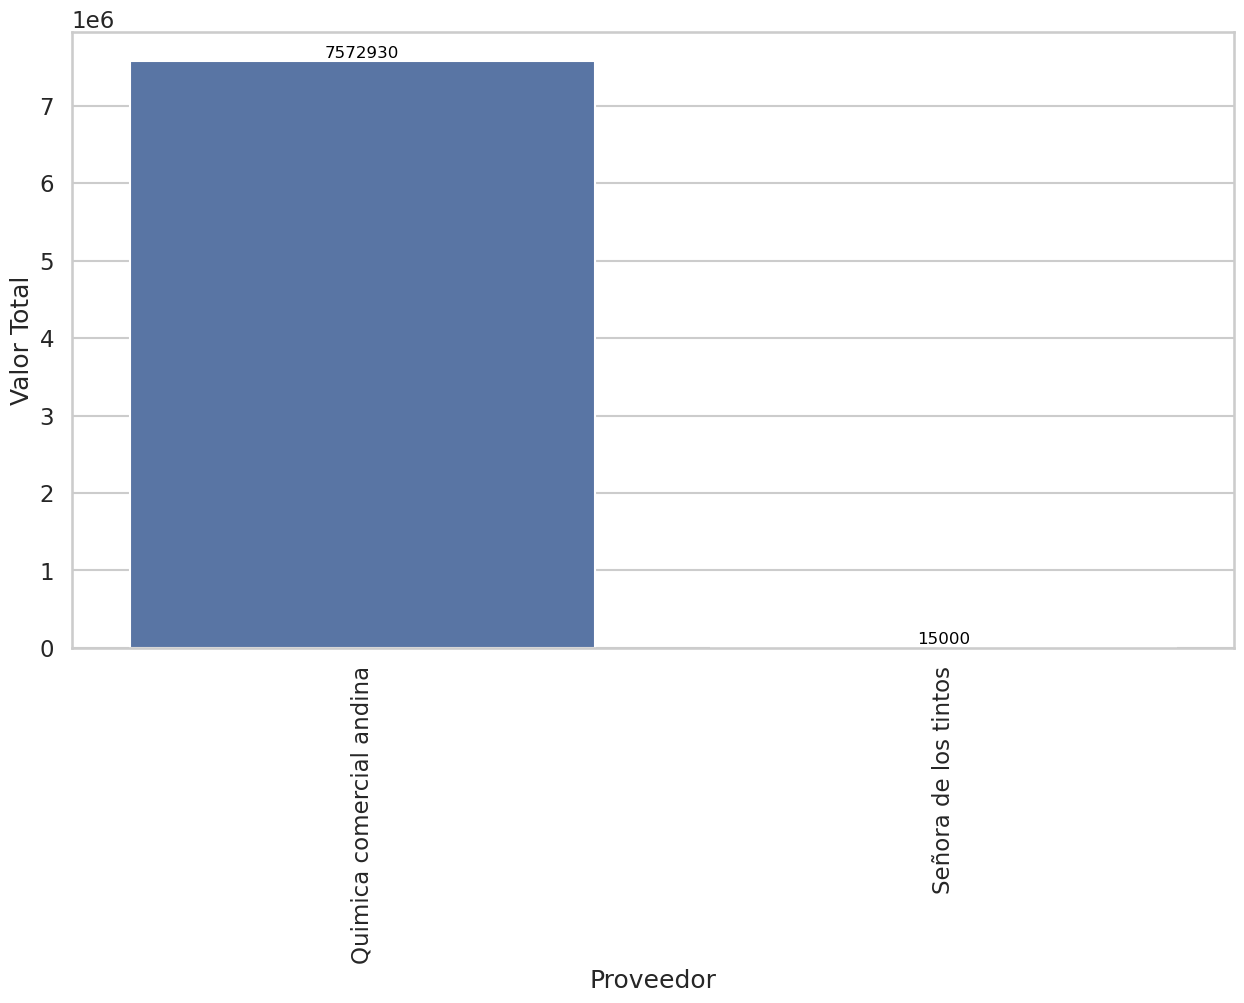

In [418]:
df_Gastos_Clientes = df_Gastos.groupby('Proveedor')['Valor Total'].sum().sort_values(ascending=False).reset_index()

fig = plt.figure(figsize=(15, 8))
ax = sns.barplot(data=df_Gastos_Clientes, x='Proveedor', y='Valor Total')

ax.tick_params(axis='x', rotation=90)

# Iterar sobre las barras del gráfico
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

plt.show()

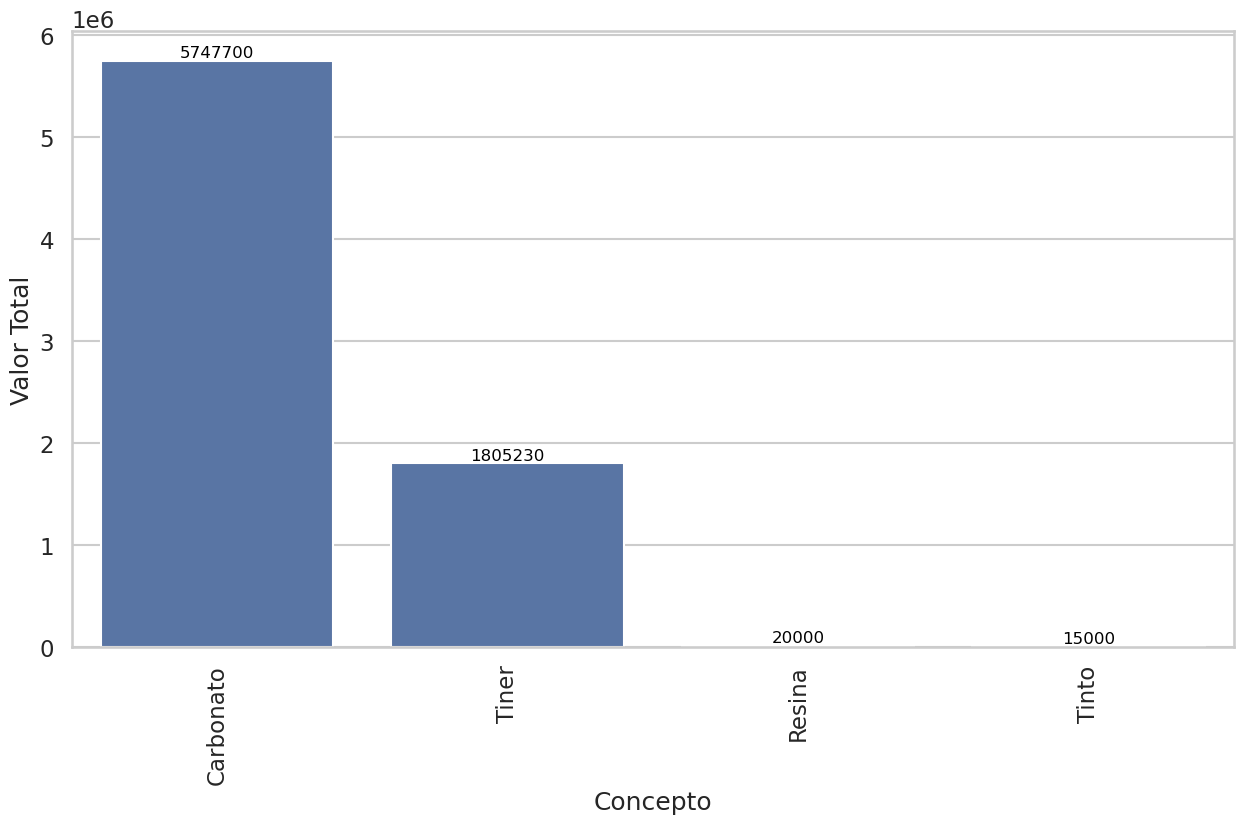

In [419]:
df_Gastos_Concepto = df_Gastos.groupby('Concepto').sum(numeric_only=True).reset_index().sort_values('Valor Total', ascending=False)

fig = plt.figure(figsize=(15,8))
ax = sns.barplot(data=df_Gastos_Concepto, x='Concepto', y='Valor Total')
ax.tick_params(axis='x', rotation=90)

# Iterar sobre las barras del gráfico
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

plt.show()

# Ingresos

In [420]:
print('Se ingreso un total de ${} pesos'.format(ventas_totales-Gastos_totales))

Se ingreso un total de $-7147930 pesos
